# Mappeoppgave 6

**Koden til oppgaven er inspirert av Espen Sirnes SOK-1005, kap.11 - interaktive websider og 9-webskraping med python. hentet fra:** https://github.com/espensirnes/notebooks
**Begynnelsen av oppgaven er hentet fra mappeoppgave 5**

In [3]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all("table")
    return tables

tables=fetch_html_tables("https://e24.no/spesial/skattelister/2020/1103/")
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">ODD<!-- --> <!-- -->TORLAND</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/1103/">Stavanger</a>, f.<!-- --> <!-- -->1964</div></td><td class="text-right">54 377 457</td><td class="text-right">92 827 913</td><td class="text-right">23 486 912</td></tr><tr><td>2<!-- -->.</td><td><div class="name">STEINAR<!-- --> <!-- -->VÅGE</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/1103/">Stavanger</a>, f.<!-- --> <!-- -->1964</div></td><td class="text-right">51 818 624</td><td class="text-right">86 911 293</td><td class="text-right">6 293 171</td></tr><tr><td>3<!-- -->.</td><td><div class="name">ESPEN<!

In [44]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all("tr"):
        r=[]
        #finding all cells in each row:
        cells=row.find_all("td")
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all("th")
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ""
    else:
        s=" ".join([str(c) for c in cell.content])
        
    #Cleaning the script:
    s=s.replace("\xa0","")
    s=s.replace("\n","")
    s=s.replace("Stavanger", "")
    s=s.replace("\ue5cf", "")
 
   
    return s

table=html_to_table(table_html)


print(str(table)[:1000])

[['', 'Navn', 'Inntekt', 'Formue', 'Skatt'], ['1.', 'ODD TORLAND, f.1964', '54377457', '92827913', '23486912'], ['2.', 'STEINAR VÅGE, f.1964', '51818624', '86911293', '6293171'], ['3.', 'ESPEN FJOGSTAD, f.1963', '50017044', '52876713', '16349593'], ['4.', 'OLE ERTVAAG, f.1963', '40734868', '250322420', '16388986'], ['5.', 'ERLING UELAND, f.1963', '32079779', '91729602', '16020523'], ['6.', 'TORE CHRISTIANSEN, f.1962', '29418089', '31641913', '13824105'], ['7.', 'DAG SIGVART KAADA, f.1973', '26580661', '56302911', '11760242'], ['8.', 'EGIL MESSMER, f.1975', '25530659', '110321798', '9212441'], ['9.', 'BJØRN MAASEIDE, f.1968', '24804456', '275086832', '10530777'], ['10.', 'RONNY GRANLI, f.1972', '24361006', '16076038', '7978172'], ['11.', 'KJELL SKAPPEL, f.1977', '23809216', '0', '8784657'], ['12.', 'TORSTEIN EREVIK, f.1949', '23787748', '119997626', '8565038'], ['13.', 'NORALV GEIR BØE, f.1958', '23618210', '9548418', '10887528'], ['14.', 'JARLE MADSEN, f.1958', '23160316', '7089003', '

In [45]:
f=open('skattstavanger.csv','w')
";".join(table[0])

';Navn;Inntekt;Formue;Skatt'

In [46]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('skattstavanger.csv',table)

In [47]:
import pandas as pd
pd.read_csv('skattstavanger.csv', delimiter=';', encoding='UTF-8')


,Unnamed: 0,Navn,Inntekt,Formue,Skatt
0,1.0,"ODD TORLAND, f.1964",54377457,92827913,23486912
1,2.0,"STEINAR VÅGE, f.1964",51818624,86911293,6293171
2,3.0,"ESPEN FJOGSTAD, f.1963",50017044,52876713,16349593
3,4.0,"OLE ERTVAAG, f.1963",40734868,250322420,16388986
4,5.0,"ERLING UELAND, f.1963",32079779,91729602,16020523
5,6.0,"TORE CHRISTIANSEN, f.1962",29418089,31641913,13824105
6,7.0,"DAG SIGVART KAADA, f.1973",26580661,56302911,11760242
7,8.0,"EGIL MESSMER, f.1975",25530659,110321798,9212441
8,9.0,"BJØRN MAASEIDE, f.1968",24804456,275086832,10530777
9,10.0,"RONNY GRANLI, f.1972",24361006,16076038,7978172


In [79]:
from matplotlib import pyplot as plt
import numpy as np

data = pd.read_csv('skattstavanger.csv', delimiter=';', encoding='UTF-8')

Text(1.0, 1.0, 'Inntekt og skatt i Stavanger')

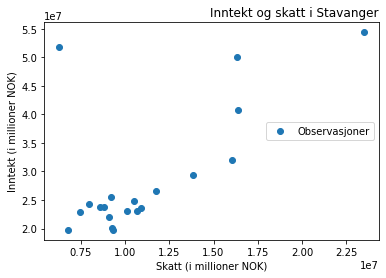

In [80]:
fig,ax=plt.subplots()

ax.scatter(data["Skatt"], data["Inntekt"], label = "Observasjoner")
ax.set_ylabel("Inntekt (i millioner NOK)")
ax.set_xlabel('Skatt (i millioner NOK)')
ax.legend(loc='right',frameon=True)
plt.title(label="Inntekt og skatt i Stavanger", loc="right")


**Skal gjøre dette plottet fra mappeoppgave 5 til et interaktiv plot.**

In [81]:
data['size']=data['Formue'].apply(lambda formue: formue**0.5/300)
data

,Unnamed: 0,Navn,Inntekt,Formue,Skatt,size
0,1.0,"ODD TORLAND, f.1964",54377457,92827913,23486912,32.115748
1,2.0,"STEINAR VÅGE, f.1964",51818624,86911293,6293171,31.075409
2,3.0,"ESPEN FJOGSTAD, f.1963",50017044,52876713,16349593,24.238792
3,4.0,"OLE ERTVAAG, f.1963",40734868,250322420,16388986,52.738603
4,5.0,"ERLING UELAND, f.1963",32079779,91729602,16020523,31.925191
5,6.0,"TORE CHRISTIANSEN, f.1962",29418089,31641913,13824105,18.750382
6,7.0,"DAG SIGVART KAADA, f.1973",26580661,56302911,11760242,25.011755
7,8.0,"EGIL MESSMER, f.1975",25530659,110321798,9212441,35.011395
8,9.0,"BJØRN MAASEIDE, f.1968",24804456,275086832,10530777,55.285806
9,10.0,"RONNY GRANLI, f.1972",24361006,16076038,7978172,13.364978


In [82]:
data.insert(2, "Kjønn", ["Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", "Mann", 
                         "Mann", "Kvinne", "Mann", "Mann"], True)
Kjønn={'Mann': 'mann', 'Kvinne': 'kvinne'}
color={'Mann': '#E14827', 'Kvinne': '#84E127'}

data['kjønn']=data['Kjønn'].apply(lambda cont: Kjønn[cont])
data['colors']=data['Kjønn'].apply(lambda cont: color[cont])
data

,Unnamed: 0,Navn,Kjønn,Inntekt,Formue,Skatt,size,kjønn,colors
0,1.0,"ODD TORLAND, f.1964",Mann,54377457,92827913,23486912,32.115748,mann,#E14827
1,2.0,"STEINAR VÅGE, f.1964",Mann,51818624,86911293,6293171,31.075409,mann,#E14827
2,3.0,"ESPEN FJOGSTAD, f.1963",Mann,50017044,52876713,16349593,24.238792,mann,#E14827
3,4.0,"OLE ERTVAAG, f.1963",Mann,40734868,250322420,16388986,52.738603,mann,#E14827
4,5.0,"ERLING UELAND, f.1963",Mann,32079779,91729602,16020523,31.925191,mann,#E14827
5,6.0,"TORE CHRISTIANSEN, f.1962",Mann,29418089,31641913,13824105,18.750382,mann,#E14827
6,7.0,"DAG SIGVART KAADA, f.1973",Mann,26580661,56302911,11760242,25.011755,mann,#E14827
7,8.0,"EGIL MESSMER, f.1975",Mann,25530659,110321798,9212441,35.011395,mann,#E14827
8,9.0,"BJØRN MAASEIDE, f.1968",Mann,24804456,275086832,10530777,55.285806,mann,#E14827
9,10.0,"RONNY GRANLI, f.1972",Mann,24361006,16076038,7978172,13.364978,mann,#E14827


In [83]:
data[['Navn', 'Fodt']] = data['Navn'].str.split(',', expand=True)
data


,Unnamed: 0,Navn,Kjønn,Inntekt,Formue,Skatt,size,kjønn,colors,Fodt
0,1.0,ODD TORLAND,Mann,54377457,92827913,23486912,32.115748,mann,#E14827,f.1964
1,2.0,STEINAR VÅGE,Mann,51818624,86911293,6293171,31.075409,mann,#E14827,f.1964
2,3.0,ESPEN FJOGSTAD,Mann,50017044,52876713,16349593,24.238792,mann,#E14827,f.1963
3,4.0,OLE ERTVAAG,Mann,40734868,250322420,16388986,52.738603,mann,#E14827,f.1963
4,5.0,ERLING UELAND,Mann,32079779,91729602,16020523,31.925191,mann,#E14827,f.1963
5,6.0,TORE CHRISTIANSEN,Mann,29418089,31641913,13824105,18.750382,mann,#E14827,f.1962
6,7.0,DAG SIGVART KAADA,Mann,26580661,56302911,11760242,25.011755,mann,#E14827,f.1973
7,8.0,EGIL MESSMER,Mann,25530659,110321798,9212441,35.011395,mann,#E14827,f.1975
8,9.0,BJØRN MAASEIDE,Mann,24804456,275086832,10530777,55.285806,mann,#E14827,f.1968
9,10.0,RONNY GRANLI,Mann,24361006,16076038,7978172,13.364978,mann,#E14827,f.1972


In [84]:
from bokeh.plotting import figure

#creating figure:
figur = figure(
        title = "Forhold mellom skatt og formue", 
        x_axis_label = 'Formue',
        y_axis_label = 'Skatt',
    
        x_axis_type = "log",
    
        tools="hover", 
        tooltips = [
            ("Navn","@Navn"),
            ("Inntekt","@Inntekt"),
            ("Formue","@Formue"),
            ("Skatt","@Skatt"),
            ("Fodt", "@Fodt")
            ],
    
        plot_height = 580,
        plot_width = 980)

In [97]:
from bokeh.io import show, output_notebook
from bokeh.plotting import output_file

figur.scatter(
    source=data,
    x= 'Formue', 
    y= 'Skatt',
    color= 'colors',
    size='size', 
    alpha= 0.6
    )

figur.xaxis.major_label_overrides = {50000000: "50 millioner", 100000000: '100 millioner', 1000000000: '1 milliard', 10000000000: "10 miliard" }
figur.yaxis.major_label_overrides = {10000000: '10 millioner', 15000000: '15 millioner', 200000000: '20 millioner' }



#Creating the graph and saving as html
output_notebook()
output_file("Stavangers 19 rikeste 2020.html")
show(figur)

Loading BokehJS ...